In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ds_path = "/content/drive/My Drive/Dataset Tanaman Herbal"
img_files = os.listdir(ds_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Praproses dan Ekstraksi Ciri**

In [ ]:
def create_dataset():
    names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy']
    df = pd.DataFrame([], columns=names)
    for file in img_files:
        imgpath = ds_path + '/' + file
        main_img = cv2.imread(imgpath)
        
        #Preprocessing
        img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
        gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gs, (25,25),0)
        ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        kernel = np.ones((50,50),np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
        
        #Ekstraksi Ciri Bentuk
        contours, image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]
        M = cv2.moments(cnt)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        rectangularity = w*h/area
        circularity = ((perimeter)**2)/area
        
        #Ekstraksi Ciri Warna
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0
        
        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)
        
        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)
        
        #Ekstraksi Ciri Tekstur
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]
        
        vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,inverse_diff_moments,entropy
                 ]
        
        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)
        print(file)
    return df

**Membuat Dataset**

In [ ]:
dataset = create_dataset()

199.JPG
170.JPG
175.JPG
174.JPG
185.JPG
169.JPG
197.JPG
191.JPG
196.JPG
192.JPG
176.JPG
155.JPG
181.JPG
187.JPG
183.JPG
157.JPG
200.JPG
156.JPG
193.JPG
154.JPG
186.JPG
194.JPG
151.JPG
184.JPG
153.JPG
164.JPG
177.JPG
160.JPG
159.JPG
173.JPG
163.JPG
178.JPG
129.JPG
123.JPG
122.JPG
108.JPG
125.JPG
115.JPG
138.JPG
140.JPG
137.JPG
103.JPG
146.JPG
121.JPG
106.JPG
105.JPG
110.JPG
120.JPG
145.JPG
150.JPG
118.JPG
134.JPG
126.JPG
113.JPG
127.JPG
116.JPG
132.JPG
149.JPG
142.JPG
136.JPG
139.JPG
188.JPG
179.JPG
158.JPG
162.JPG
189.JPG
171.JPG
190.JPG
166.JPG
172.JPG
195.JPG
168.JPG
167.JPG
180.JPG
152.JPG
161.JPG
165.JPG
182.JPG
198.JPG
107.JPG
112.JPG
128.JPG
148.JPG
131.JPG
141.JPG
124.JPG
104.JPG
144.JPG
114.JPG
102.JPG
147.JPG
119.JPG
101.JPG
143.JPG
109.JPG
111.JPG
130.JPG
133.JPG
135.JPG
117.JPG
251.JPG
260.JPG
263.JPG
261.JPG
265.JPG
264.JPG
262.JPG
270.JPG
268.JPG
271.JPG
267.JPG
272.JPG
274.JPG
252.JPG
273.JPG
276.JPG
278.JPG
275.JPG
277.JPG
253.JPG
279.JPG
281.JPG
280.JPG
284.JPG
285.JPG


In [ ]:
dataset.shape

(300, 17)

**Menyimpan Dataset ke CSV**

In [ ]:
dataset.to_csv("Dataset_Daun_Tanaman_Herbal.csv")

**Membaca Dataset**

In [ ]:
import string

In [ ]:
dataset_daun_herbal = pd.read_csv("Dataset_Daun_Tanaman_Herbal.csv")

In [ ]:
dataset_daun_herbal.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,5314528.0,12254.393261,2091,5029,0.415788,1.978659,28.256536,141.524051,148.819748,133.722071,66.010105,55.134421,77.138947,3.714767,0.999498,0.568340,9.468771
1,0,7920045.5,12689.177632,1998,5184,0.385417,1.307774,20.330089,152.597358,165.802121,136.274327,78.004975,64.770272,92.465421,6.777056,0.999311,0.481985,10.473779
2,0,10332361.5,13852.156553,4769,3162,1.508223,1.459451,18.570996,142.788639,165.160994,115.510576,76.703042,57.501641,99.311056,6.131957,0.999335,0.513775,8.965062
3,0,11083780.5,14973.490461,5081,3064,1.658290,1.404592,20.228244,156.068677,180.408847,121.084746,69.448245,52.703018,95.002142,6.955309,0.999092,0.507087,9.211151
4,0,11133737.0,14013.956074,4194,3456,1.213542,1.301851,17.639267,141.431441,162.998647,114.407385,73.660976,57.672767,93.829191,9.218659,0.998952,0.463108,9.566383


**Membuat Label**

In [ ]:
breakpoints = [1,50,51,100,101,150,151,200,201,250,251,300]

In [ ]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [ ]:
y = np.array(target_list)
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X = dataset_daun_herbal.iloc[:,1:]

In [ ]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,5314528.0,12254.393261,2091,5029,0.415788,1.978659,28.256536,141.524051,148.819748,133.722071,66.010105,55.134421,77.138947,3.714767,0.999498,0.568340,9.468771
1,7920045.5,12689.177632,1998,5184,0.385417,1.307774,20.330089,152.597358,165.802121,136.274327,78.004975,64.770272,92.465421,6.777056,0.999311,0.481985,10.473779
2,10332361.5,13852.156553,4769,3162,1.508223,1.459451,18.570996,142.788639,165.160994,115.510576,76.703042,57.501641,99.311056,6.131957,0.999335,0.513775,8.965062
3,11083780.5,14973.490461,5081,3064,1.658290,1.404592,20.228244,156.068677,180.408847,121.084746,69.448245,52.703018,95.002142,6.955309,0.999092,0.507087,9.211151
4,11133737.0,14013.956074,4194,3456,1.213542,1.301851,17.639267,141.431441,162.998647,114.407385,73.660976,57.672767,93.829191,9.218659,0.998952,0.463108,9.566383


In [ ]:
y[0:5]

array([3, 3, 3, 3, 3])

**Train Test Split dengan Data Training 70% dan Data Testing 30%**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
253,53.0,28.142135,10,9,1.111111,1.698113,14.943015,140.497102,146.884500,129.448644,60.863025,51.918052,75.493578,6.106340,0.999064,0.453738,9.484868
19,3680496.5,8296.895110,2133,2585,0.825145,1.498114,18.703582,195.844663,201.326510,186.484916,61.533114,50.685838,78.897473,3.536454,0.999456,0.604683,8.675645
14,334.0,69.941125,21,23,0.913043,1.446108,14.645991,131.522901,136.485379,126.228877,57.371424,49.671415,65.294599,4.270803,0.999257,0.561548,9.841272
91,12066938.0,24508.052536,5184,3300,1.570909,1.417692,49.776061,121.117364,133.490388,107.149906,82.150558,72.833931,92.025936,8.827699,0.999269,0.463600,9.411641
296,9156.0,500.048771,141,128,1.101562,1.971166,27.309827,136.308502,149.405429,114.745368,61.260323,53.091634,76.147713,10.061950,0.998493,0.401936,10.429487


In [ ]:
y_train[0:5]

array([0, 3, 3, 2, 0])

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train[0:2]

array([[-1.23144358, -1.13427457, -1.29755071, -1.21748244, -0.34910489,
        -0.02187504, -0.53717018, -0.97489003, -1.24796217, -0.91244128,
        -0.64317522, -0.56206745, -0.68058398, -0.60623384,  0.55261928,
        -0.96031978,  0.3090499 ],
       [-0.29603539, -0.21327866, -0.25784318,  0.33990381, -0.52686777,
        -0.24908799, -0.44509409,  1.64541178,  1.63963561,  1.70205733,
        -0.56233197, -0.72600036, -0.30969565, -0.76885875,  0.73162321,
         0.97871065, -1.15746334]])

In [ ]:
y_train[0:2]

array([0, 3])

Membuat Model Klasifikasi dengan SVM 

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       1.00      0.94      0.97        18
           2       0.92      0.85      0.88        13
           3       0.89      0.53      0.67        15
           4       0.71      0.80      0.75        15
           5       0.60      0.80      0.69        15

    accuracy                           0.80        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.80      0.80        90



Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [ ]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
svm_clf.best_params_

{'C': 100, 'kernel': 'linear'}

In [ ]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.219 (+/-0.129) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.433 (+/-0.149) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.643 (+/-0.154) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.710 (+/-0.102) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.714 (+/-0.085) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.662 (+/-0.070) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.457 (+/-0.102) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.633 (+/-0.137) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.724 (+/-0.155) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.767 (+/-0.076) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.748 (+/-0.049) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.690 (+/-0.109) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.633 (+/-0.137) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.719 (+/-0.163) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.814 (+/-0.070) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.762 (+/-0.085) for {'C': 100, 'gamma': 0.1, 'kernel':

In [ ]:
y_pred_svm = svm_clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_svm)

0.8444444444444444

In [ ]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        14
           1       1.00      1.00      1.00        18
           2       0.91      0.77      0.83        13
           3       0.92      0.73      0.81        15
           4       0.92      0.80      0.86        15
           5       0.78      0.93      0.85        15

    accuracy                           0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.86      0.84      0.85        90



Mengetes Klasifikasi dengan Citra Daun yang Belum Terklasifikasi

In [ ]:
def bg_sub(filename):
    test_img_path = '/content/drive/My Drive/' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, ret_image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [ ]:
filename = 'Daun_Sirih_Test.jpg' 
bg_rem_img = bg_sub(filename)

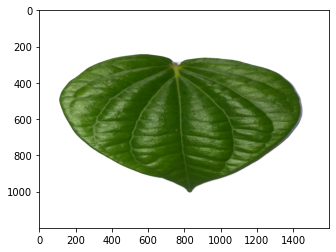

In [ ]:
plt.imshow(bg_rem_img)

In [ ]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy']
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Ekstraksi Ciri Bentuk
    contours, image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Ekstraksi Ciri Warna
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Ekstraksi Ciri Tekstur
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [ ]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,714683.5,3503.666416,1339,761,1.759527,1.425777,17.176384,24.919225,37.431304,10.819678,36.44965,50.74582,23.226978,91.330043,0.99373,0.737089,5.133321


In [ ]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[-1.04981568 -0.74716134 -0.64669282 -0.76284173  0.05396488 -0.33126901
  -0.48248696 -6.44665627 -7.05334682 -6.35030138 -3.58853955 -0.7180203
  -6.37555147  4.78680547 -1.88027161  2.67958955 -7.57703492]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- pysiological_length
- pysiological_width
Feature names seen at fit time, yet now missing:
- physiological_length
- physiological_width

  warnings.warn(message, FutureWarning)


1

In [ ]:
common_names = ['Lidah Buaya', 'Sirih', 'Pepaya', 'Kunyit', 'Sirsak', 'Jambu']
common_names[y_pred_mobile[0]]

'Sirih'